In [1]:
import itertools
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm
from dataclasses import asdict, dataclass, field
import vsketch
import shapely.geometry as sg
from shapely.geometry import box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString
import shapely.affinity as sa
import shapely.ops as so
import matplotlib.pyplot as plt
import pandas as pd

import vpype_cli
from typing import List, Generic
from genpen import genpen as gp, utils as utils
from scipy import stats as ss
import geopandas
from shapely.errors import TopologicalError
import functools
import vpype
from skimage import io
from pathlib import Path

import bezier

from sklearn.preprocessing import minmax_scale
from skimage import feature
from genpen.utils import Paper

from scipy import spatial, stats
from scipy.ndimage import gaussian_filter
from scipy.integrate import odeint
from functools import partial

import fn
from genpen.axicam import AxiCam

%load_ext autoreload
%autoreload 2


In [85]:
# make page
paper_size = '12x9 inches'
border:float=15
paper = Paper(paper_size)

drawbox = paper.get_drawbox(border)

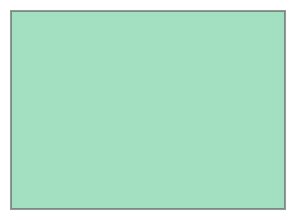

In [86]:
drawbox

In [87]:
db = gp.Shape(drawbox)

In [111]:
n_shapes = 5
radius = 10
y_starts = np.linspace(db.bottom+60, db.top-60, n_shapes)

In [112]:
init_points = [Point(db.left, y) for y in y_starts]

In [113]:
init_shapes = [pt.buffer(radius) for pt in init_points]

In [119]:
x_steps = np.linspace(3.1, 10.1, n_shapes)

In [120]:
spacing = 2
y_delta_std = 3
y_delta_gen = ss.norm(0, y_delta_std).rvs

fill_sets = []
for shape, x_step in zip(init_shapes, x_steps):
    fill_set = []
    x = shape.centroid.x
    while x < db.right:
        
        hatched = gp.HatchFill(shape, spacing=spacing, degrees=90)
        fill_set.append(hatched.fill)
        shape = sa.translate(shape, xoff=x_step, yoff=y_delta_gen())
        x = shape.centroid.x
    fill_sets += fill_set

In [121]:
merged = gp.merge_LineStrings(fill_sets)

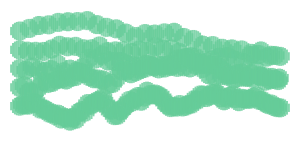

In [122]:
merged

In [123]:
sk = vsketch.Vsketch()
sk.size(paper.page_format_mm)
sk.scale('1mm')
sk.penWidth('0.3mm')


sk.geometry(merged)
    
sk.display()

<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2022-08-14T16:10:16.490007

In [124]:
import fn
plot_id = fn.new_plot_id()
savedir='/home/naka/art/plotter_svgs'
savepath = Path(savedir).joinpath(f'{plot_id}.svg').as_posix()
sk.save(savepath)

saved 20220814-161019_539131-793c6-72511c to s3://algorithmic-ink/current_plot_id
